# Prediciting PV Power using Solar Irradiance using Pregression Models
## Producing the final plots to be inserted on the RISE poster board

### Imported Packages

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import numpy as np
import seaborn as sns
from scipy import stats
from scipy.stats import linregress
from sklearn.metrics import mean_squared_error
from scipy.optimize import curve_fit
from sklearn.metrics import r2_score
import matplotlib.dates as mdates
from matplotlib.dates import DateFormatter, MonthLocator, WeekdayLocator, MO
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_absolute_error

### 8 Variables (all scatterplots/graphs are using the 5 min resolution dataset)
#### More points mean more accuracy

Working with 5 and 30 minute resolutions with the start time of "6/1/17 0:00" and end time of "6/30/17 23:55", there are 8 variables we will explore analyze their relationships. They are below, their definitions, and units:

- Time Stamps (UTC): format='%m/%d/%y %H:%M'
- PV Power Outputs of Residential of a Single Rooftop Solar Panels (watts)
- Ambient Temperature (°C)
- Wind Speed at 10 m above MSL (m/s)
- Wind Direction at 10 m above MSL (degrees)
- Direct Normal Irradiance (DNI): the component that is involved in thermal (concentrating solar power, CSP) and photovoltaic concentration technology (concentrated photovoltaic, CPV).
- Global Horizontal Irradiance (GHI): the sum of direct and diffuse radiation received on a horizontal plane. GHI is a reference radiation for the comparison of climatic zones; it is also essential parameter for calculation of radiation on a tilted plane.
- Global Tilt Irradiance (GTI): total radiation received on a surface with defined tilt and azimuth, fixed or sun-tracking. This is the sum of the scattered radiation, direct and reflected. It is a reference for photovoltaic (PV) applications, and can be occasionally affected by shadow.

### Supervised Learning Models (8 total)
- Linear Regression (only for linear relationships)
    - Lasso Regression
    - Ridge Regression
- Polynomial Regression (only for polynomial relationships)
- Support Vector Regression (SVR; non-Kernel aka. linear)
- Decision Tree 
- Random Forest
- XG Boost (type of Gradient Boosting Regression)

---

### Correlation Matrix

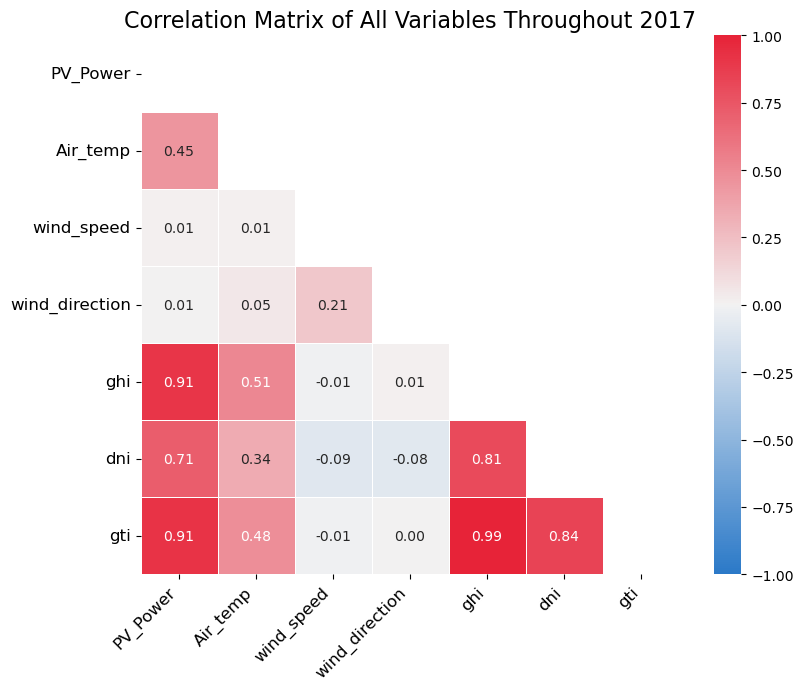

In [2]:
# Load the data from the CSV file
file_path = './FINAL_PV_POWER_5_MINS.csv'
data = pd.read_csv(file_path)

# Convert the TimeStamp column to datetime format
data['TimeStamp'] = pd.to_datetime(data['TimeStamp'], format='%m/%d/%y %H:%M')

# Filter the data for the specified date range
start_time = '1/1/17 0:00'
end_time = '12/31/17 23:55'
mask = (data['TimeStamp'] >= start_time) & (data['TimeStamp'] <= end_time)
filtered_data = data.loc[mask]

# Drop the TimeStamp column for the correlation matrix calculation
correlation_data = filtered_data.drop(columns=['TimeStamp'])

# Calculate the correlation matrix
correlation_matrix = correlation_data.corr()

# Define the color map
cmap = sns.diverging_palette(250, 10, s=90, l=50, as_cmap=True)

# Create a mask for the upper triangle
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))

# Plot the correlation matrix with the specified formatting
plt.figure(figsize=(9, 7))
sns.heatmap(correlation_matrix, mask=mask, cmap=cmap, vmax=1, vmin=-1, center=0,
            annot=True, fmt=".2f", square=True, linewidths=.5, cbar_kws={"shrink": 1.0},
            annot_kws={"size": 10})
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.yticks(fontsize=12)
plt.title('Correlation Matrix of All Variables Throughout 2017', fontsize=16)

plt.show()

---

### Predicted PV Power vs. Actual PV Power (Simple Scatterplot Regression)
#### Modeled using each regression model and will print out the following evaluation metrics of each model:
- MAE (W)
- MSE (W)
- RMSE (W)
- nRMSE (%)
- R²

#### Linear Regression

Linear Regression - MAE: 89.41644575765368, MSE: 37492.49223415462, RMSE: 193.6297813719641, R^2: 0.8442199472747721, nRMSE: 6.815428754757743%


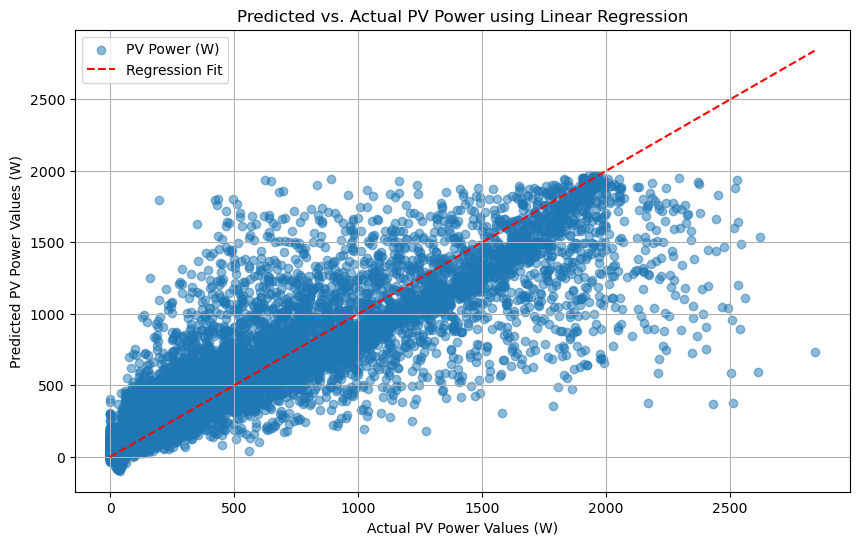

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Load dataset
data = pd.read_csv("./FINAL_PV_POWER_5_MINS.csv")

# Remove rows with missing values
data = data.dropna(subset=['PV_Power', 'ghi', 'dni', 'gti'])

# Extract relevant features and target
X = data[['ghi', 'dni', 'gti']]
y = data['PV_Power']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

# Calculate evaluation metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)
nrmse = (rmse / (y.max() - y.min())) * 100

print(f'Linear Regression - MAE: {mae}, MSE: {mse}, RMSE: {rmse}, R^2: {r2}, nRMSE: {nrmse}%')

# Plot results
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, label='PV Power (W)', alpha=0.5)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--', label='Regression Fit')
plt.xlabel('Actual PV Power Values (W)')
plt.ylabel('Predicted PV Power Values (W)')
plt.title('Predicted vs. Actual PV Power using Linear Regression')
plt.legend()
plt.grid(True)
plt.show()

#### Lasso Regression

Lasso Regression - MAE: 89.41373817861181, MSE: 37492.658153753124, RMSE: 193.63020981694237, R^2: 0.8442192578843832, nRMSE: 6.815443835269656%


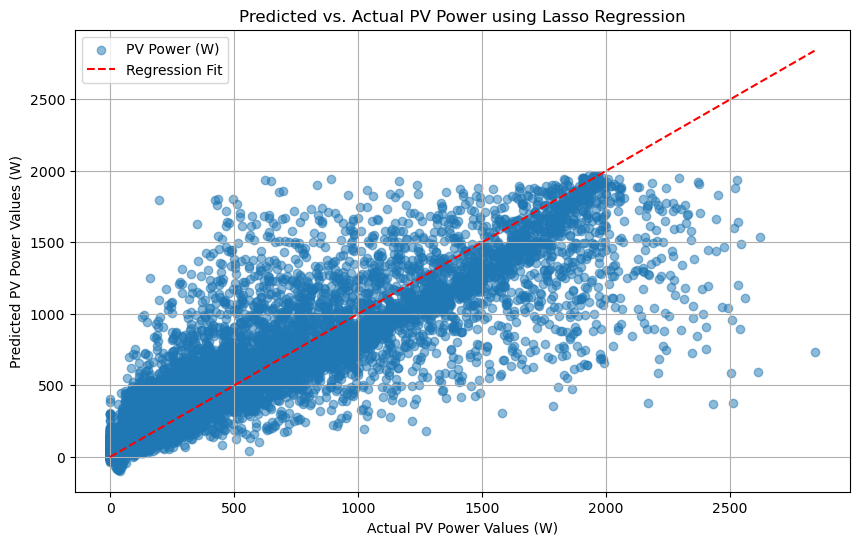

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Load dataset
data = pd.read_csv("./FINAL_PV_POWER_5_MINS.csv")

# Remove rows with missing values
data = data.dropna(subset=['PV_Power', 'ghi', 'dni', 'gti'])

# Extract relevant features and target
X = data[['ghi', 'dni', 'gti']]
y = data['PV_Power']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Lasso Regression model
model = Lasso()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

# Calculate evaluation metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)
nrmse = (rmse / (y.max() - y.min())) * 100

print(f'Lasso Regression - MAE: {mae}, MSE: {mse}, RMSE: {rmse}, R^2: {r2}, nRMSE: {nrmse}%')

# Plot results
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, label='PV Power (W)', alpha=0.5)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--', label='Regression Fit')
plt.xlabel('Actual PV Power Values (W)')
plt.ylabel('Predicted PV Power Values (W)')
plt.title('Predicted vs. Actual PV Power using Lasso Regression')
plt.legend()
plt.grid(True)
plt.show()

#### Ridge Regression

Ridge Regression - MAE: 89.41644578681166, MSE: 37492.49222762828, RMSE: 193.6297813551115, R^2: 0.8442199473018889, nRMSE: 6.815428754164561%


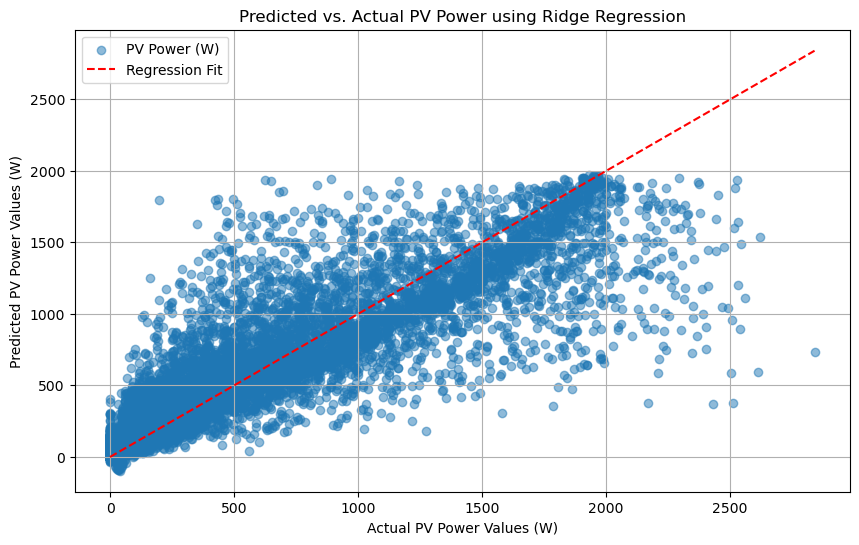

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Load dataset
data = pd.read_csv("./FINAL_PV_POWER_5_MINS.csv")

# Remove rows with missing values
data = data.dropna(subset=['PV_Power', 'ghi', 'dni', 'gti'])

# Extract relevant features and target
X = data[['ghi', 'dni', 'gti']]
y = data['PV_Power']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Ridge Regression model
model = Ridge()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

# Calculate evaluation metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)
nrmse = (rmse / (y.max() - y.min())) * 100

print(f'Ridge Regression - MAE: {mae}, MSE: {mse}, RMSE: {rmse}, R^2: {r2}, nRMSE: {nrmse}%')

# Plot results
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, label='PV Power (W)', alpha=0.5)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--', label='Regression Fit')
plt.xlabel('Actual PV Power Values (W)')
plt.ylabel('Predicted PV Power Values (W)')
plt.title('Predicted vs. Actual PV Power using Ridge Regression')
plt.legend()
plt.grid(True)
plt.show()

#### Polynomial Regression

Polynomial Regression - MAE: 89.27421842269939, MSE: 37129.899513423006, RMSE: 192.69120248060887, R^2: 0.8457265079163157, nRMSE: 6.782392423675683%


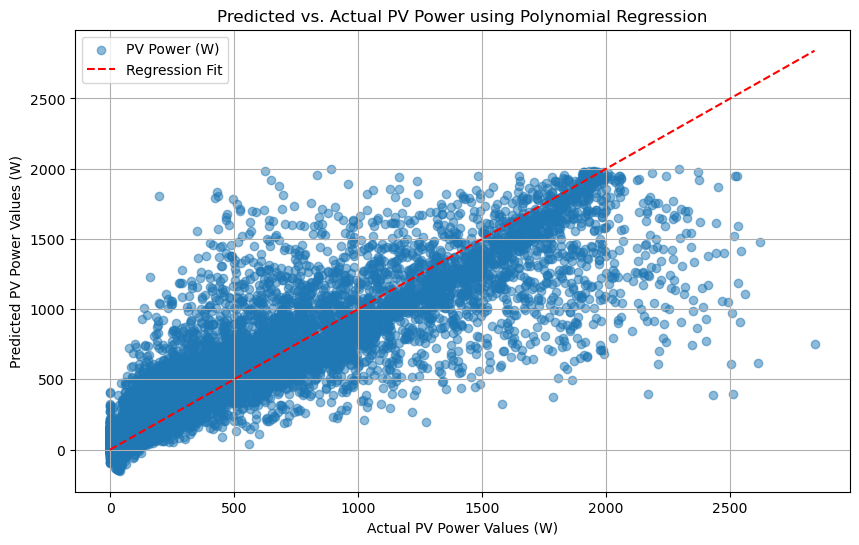

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Load dataset
data = pd.read_csv("./FINAL_PV_POWER_5_MINS.csv")

# Remove rows with missing values
data = data.dropna(subset=['PV_Power', 'ghi', 'dni', 'gti'])

# Extract relevant features and target
X = data[['ghi', 'dni', 'gti']]
y = data['PV_Power']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Polynomial Regression model
poly = PolynomialFeatures(degree=2)
X_poly_train = poly.fit_transform(X_train)
X_poly_test = poly.transform(X_test)
model = LinearRegression().fit(X_poly_train, y_train)
y_pred = model.predict(X_poly_test)

# Calculate evaluation metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)
nrmse = (rmse / (y.max() - y.min())) * 100

print(f'Polynomial Regression - MAE: {mae}, MSE: {mse}, RMSE: {rmse}, R^2: {r2}, nRMSE: {nrmse}%')

# Plot results
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, label='PV Power (W)', alpha=0.5)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--', label='Regression Fit')
plt.xlabel('Actual PV Power Values (W)')
plt.ylabel('Predicted PV Power Values (W)')
plt.title('Predicted vs. Actual PV Power using Polynomial Regression')
plt.legend()
plt.grid(True)
plt.show()

#### Support Vector Regression (non-Kernel aka. linear)

Support Vector Regression - MAE: 89.41644575765368, MSE: 37492.49223415462, RMSE: 193.6297813719641, R^2: 0.8442199472747721, nRMSE: 6.815428754757743%


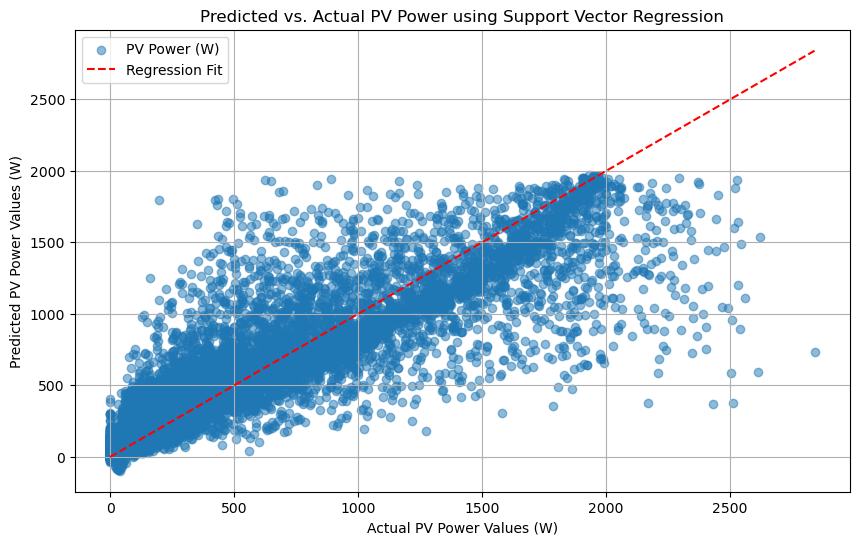

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.svm import SVR
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Load dataset
data = pd.read_csv("./FINAL_PV_POWER_5_MINS.csv")

# Remove rows with missing values
data = data.dropna(subset=['PV_Power', 'ghi', 'dni', 'gti'])

# Extract relevant features and target
X = data[['ghi', 'dni', 'gti']]
y = data['PV_Power']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Support Vector Regression model
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

# Calculate evaluation metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)
nrmse = (rmse / (y.max() - y.min())) * 100

print(f'Support Vector Regression - MAE: {mae}, MSE: {mse}, RMSE: {rmse}, R^2: {r2}, nRMSE: {nrmse}%')

# Plot results
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, label='PV Power (W)', alpha=0.5)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--', label='Regression Fit')
plt.xlabel('Actual PV Power Values (W)')
plt.ylabel('Predicted PV Power Values (W)')
plt.title('Predicted vs. Actual PV Power using Support Vector Regression')
plt.legend()
plt.grid(True)
plt.show()

#### Decision Tree 

Decision Tree Regression - MAE: 98.17566694836462, MSE: 59025.88629416591, RMSE: 242.95243627954406, R^2: 0.7547494143192213, nRMSE: 8.551499715207559%


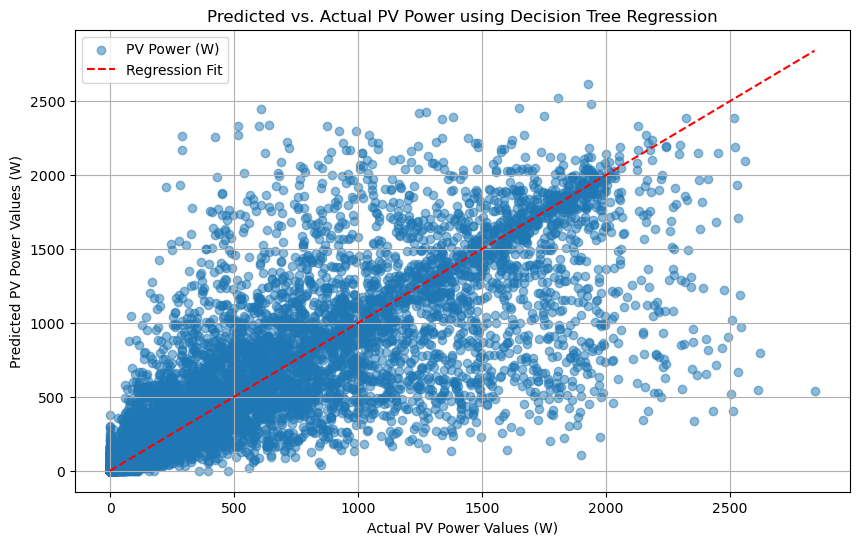

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Load dataset
data = pd.read_csv("./FINAL_PV_POWER_5_MINS.csv")

# Remove rows with missing values
data = data.dropna(subset=['PV_Power', 'ghi', 'dni', 'gti'])

# Extract relevant features and target
X = data[['ghi', 'dni', 'gti']]
y = data['PV_Power']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Decision Tree Regression model
model = DecisionTreeRegressor()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

# Calculate evaluation metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)
nrmse = (rmse / (y.max() - y.min())) * 100

print(f'Decision Tree Regression - MAE: {mae}, MSE: {mse}, RMSE: {rmse}, R^2: {r2}, nRMSE: {nrmse}%')

# Plot results
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, label='PV Power (W)', alpha=0.5)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--', label='Regression Fit')
plt.xlabel('Actual PV Power Values (W)')
plt.ylabel('Predicted PV Power Values (W)')
plt.title('Predicted vs. Actual PV Power using Decision Tree Regression')
plt.legend()
plt.grid(True)
plt.show()

#### Random Forest

Random Forest Regression - MAE: 82.28491002729733, MSE: 39329.32544435843, RMSE: 198.31622587261595, R^2: 0.8365879666492662, nRMSE: 6.9803833830231214%


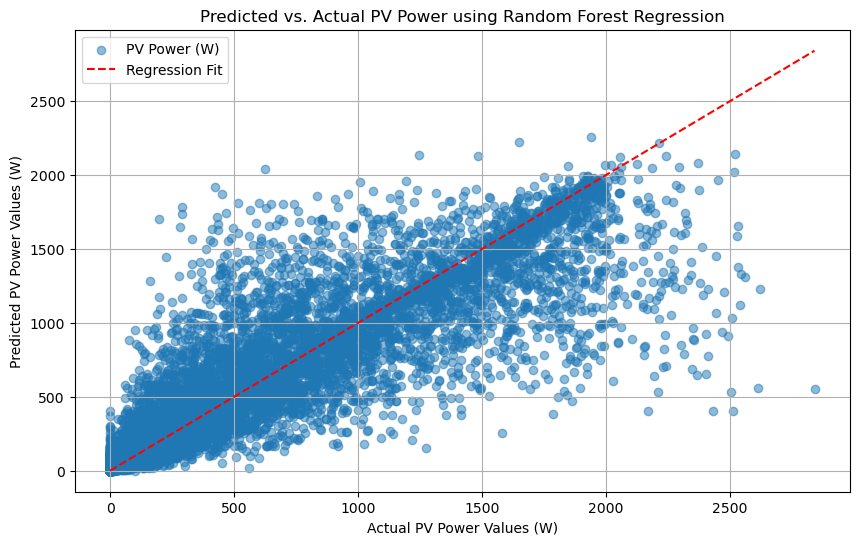

In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Load dataset
data = pd.read_csv("./FINAL_PV_POWER_5_MINS.csv")

# Remove rows with missing values
data = data.dropna(subset=['PV_Power', 'ghi', 'dni', 'gti'])

# Extract relevant features and target
X = data[['ghi', 'dni', 'gti']]
y = data['PV_Power']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Random Forest Regression model
model = RandomForestRegressor()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

# Calculate evaluation metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)
nrmse = (rmse / (y.max() - y.min())) * 100

print(f'Random Forest Regression - MAE: {mae}, MSE: {mse}, RMSE: {rmse}, R^2: {r2}, nRMSE: {nrmse}%')

# Plot results
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, label='PV Power (W)', alpha=0.5)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--', label='Regression Fit')
plt.xlabel('Actual PV Power Values (W)')
plt.ylabel('Predicted PV Power Values (W)')
plt.title('Predicted vs. Actual PV Power using Random Forest Regression')
plt.legend()
plt.grid(True)
plt.show()

#### XG Boost

XGBoost Regression - MAE: 80.59880765771088, MSE: 37708.43322297556, RMSE: 194.18659382917133, R^2: 0.8433227196801387, nRMSE: 6.835027576824104%


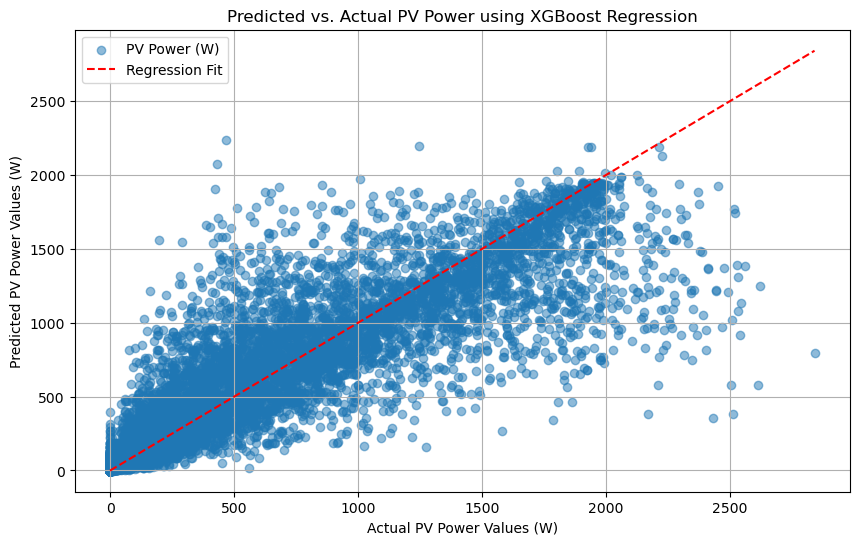

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Load dataset
data = pd.read_csv("./FINAL_PV_POWER_5_MINS.csv")

# Remove rows with missing values
data = data.dropna(subset=['PV_Power', 'ghi', 'dni', 'gti'])

# Extract relevant features and target
X = data[['ghi', 'dni', 'gti']]
y = data['PV_Power']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# XGBoost Regression model
model = XGBRegressor()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

# Calculate evaluation metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)
nrmse = (rmse / (y.max() - y.min())) * 100

print(f'XGBoost Regression - MAE: {mae}, MSE: {mse}, RMSE: {rmse}, R^2: {r2}, nRMSE: {nrmse}%')

# Plot results
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, label='PV Power (W)', alpha=0.5)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--', label='Regression Fit')
plt.xlabel('Actual PV Power Values (W)')
plt.ylabel('Predicted PV Power Values (W)')
plt.title('Predicted vs. Actual PV Power using XGBoost Regression')
plt.legend()
plt.grid(True)
plt.show()

---

#### Comparison of All 8 Regression Models and Actual Data throughout 2017

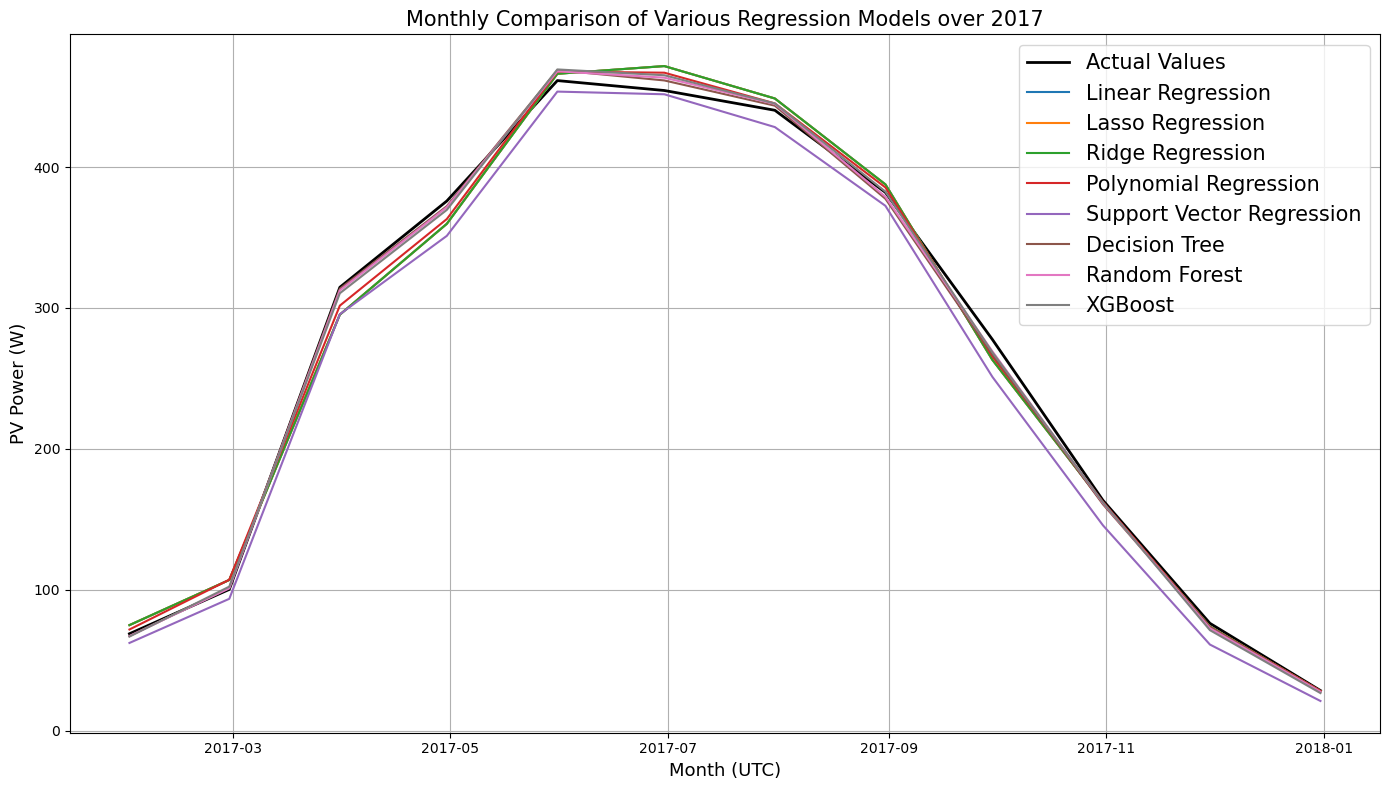

In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.pipeline import Pipeline

# Load dataset
data = pd.read_csv("./FINAL_PV_POWER_5_MINS.csv")

# Remove rows with missing values
data = data.dropna(subset=['PV_Power', 'ghi', 'dni', 'gti'])

# Convert 'TimeStamp' to datetime format, specifying the format explicitly
data['TimeStamp'] = pd.to_datetime(data['TimeStamp'], format='%m/%d/%y %H:%M')

# Extract relevant features and target
X = data[['ghi', 'dni', 'gti']]
y = data['PV_Power']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define regression models
models = {
    'Linear Regression': LinearRegression(),
    'Lasso Regression': Lasso(),
    'Ridge Regression': Ridge(),
    'Polynomial Regression': Pipeline([('poly', PolynomialFeatures(degree=2)), ('linear', LinearRegression())]),
    'Support Vector Regression': Pipeline([('scaler', StandardScaler()), ('svr', SVR())]),
    'Decision Tree': DecisionTreeRegressor(),
    'Random Forest': RandomForestRegressor(),
    'XGBoost': XGBRegressor()
}

# Initialize DataFrame for storing predictions
results = pd.DataFrame(data['TimeStamp'])
results.set_index('TimeStamp', inplace=True)
results['Actual'] = y.values

# Fit models and store predictions
for name, model in models.items():
    model.fit(X_train, y_train)
    results[name] = model.predict(X)

# Resample data to monthly averages
monthly_results = results.resample('M').mean()

# Plot results
plt.figure(figsize=(14, 8))
plt.plot(monthly_results['Actual'], label='Actual Values', color='black', linewidth=2)
for name in models.keys():
    plt.plot(monthly_results[name], label=name)
plt.xlabel('Month (UTC)', fontsize=13)
plt.ylabel('PV Power (W)', fontsize=13)
plt.title('Monthly Comparison of Various Regression Models over 2017', fontsize=15)
plt.legend(fontsize=15)
plt.grid(True)
plt.tight_layout()
plt.show()

### Time Line Graphs - Time vs. PV Power vs. All Irridances (GHI, GTI, DNI) - all data is 5 min resolution
Time Bounds: June 21, June 2017, and all of 2017

#### June 21 (summer solstice)

/var/folders/j6/g4_nh54s61724h3sb61kzrzh0000gn/T/ipykernel_24866/2835178395.py:28: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  data['TimeStamp'] = pd.to_datetime(data['TimeStamp'])


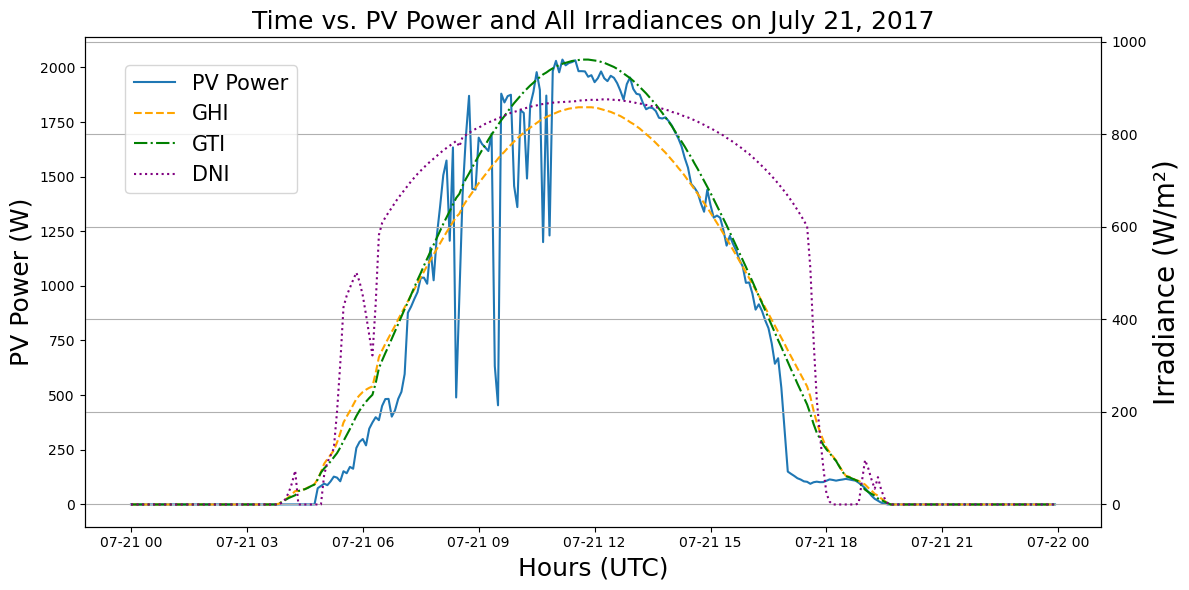

In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import numpy as np
import seaborn as sns
from scipy import stats
from scipy.stats import linregress
from sklearn.metrics import mean_squared_error
from scipy.optimize import curve_fit
from sklearn.metrics import r2_score
import matplotlib.dates as mdates
from matplotlib.dates import DateFormatter, MonthLocator, WeekdayLocator, MO
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_absolute_error

# Load the dataset
file_path = './FINAL_PV_POWER_5_MINS.csv'
data = pd.read_csv(file_path)

# Convert the 'TimeStamp' column to datetime format
data['TimeStamp'] = pd.to_datetime(data['TimeStamp'])

# Filter the data for the specified time range
start_time = '2017-07-21 00:00'
end_time = '2017-07-21 23:55'
filtered_data = data[(data['TimeStamp'] >= start_time) & (data['TimeStamp'] <= end_time)]

# Remove rows with missing 'PV_Power' values
filtered_data = filtered_data.dropna(subset=['PV_Power'])

# Plot the data with different dashes for irradiances
fig, ax1 = plt.subplots(figsize=(12, 6))

ax1.plot(filtered_data['TimeStamp'], filtered_data['PV_Power'], label='PV Power')
ax1.set_xlabel('Hours (UTC)', fontsize = 18)
ax1.set_ylabel('PV Power (W)', fontsize = 18)
ax1.tick_params(axis='y')

# Create a second y-axis to plot the irradiances with different dashes
ax2 = ax1.twinx()
ax2.plot(filtered_data['TimeStamp'], filtered_data['ghi'], color='orange', linestyle='--', label='GHI')
ax2.plot(filtered_data['TimeStamp'], filtered_data['gti'], color='green', linestyle='-.', label='GTI')
ax2.plot(filtered_data['TimeStamp'], filtered_data['dni'], color='purple', linestyle=':', label='DNI')
ax2.set_ylabel('Irradiance (W/m²)', color='black', fontsize = 20)
ax2.tick_params(axis='y', labelcolor='black')

# Add legends
fig.legend(loc='upper left', bbox_to_anchor=(0.1,0.9), fontsize=15)

# Title and grid
plt.title('Time vs. PV Power and All Irradiances on July 21, 2017', fontsize=18)
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()

# Show the plot
plt.show()

#### June 2017

/var/folders/j6/g4_nh54s61724h3sb61kzrzh0000gn/T/ipykernel_24866/4129168253.py:28: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  data['TimeStamp'] = pd.to_datetime(data['TimeStamp'])


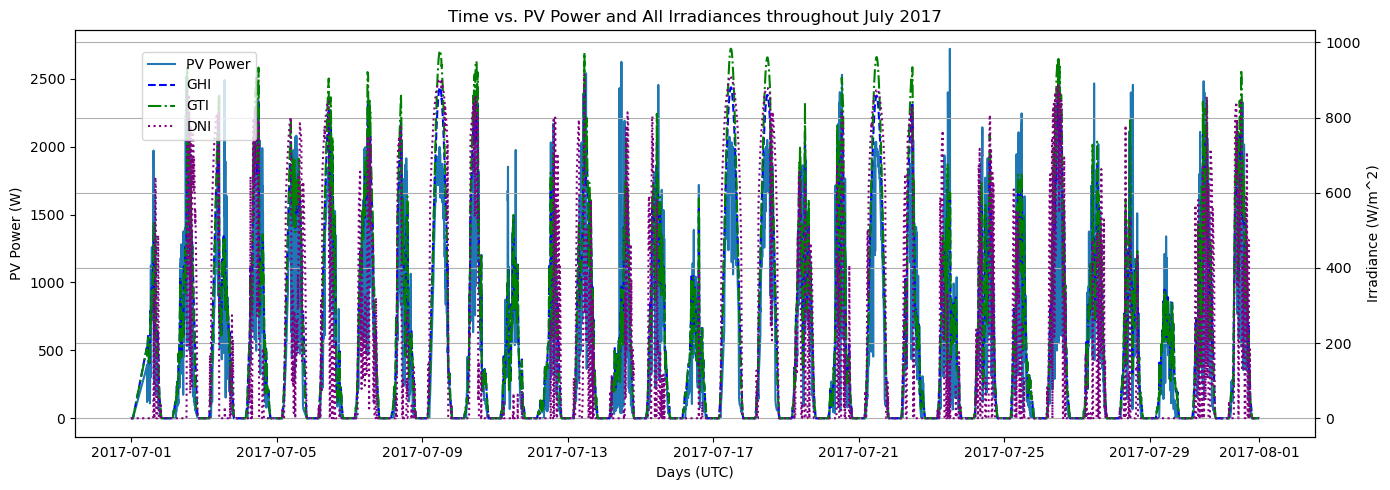

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import numpy as np
import seaborn as sns
from scipy import stats
from scipy.stats import linregress
from sklearn.metrics import mean_squared_error
from scipy.optimize import curve_fit
from sklearn.metrics import r2_score
import matplotlib.dates as mdates
from matplotlib.dates import DateFormatter, MonthLocator, WeekdayLocator, MO
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_absolute_error

# Load the dataset
file_path = './FINAL_PV_POWER_5_MINS.csv'
data = pd.read_csv(file_path)

# Convert the 'TimeStamp' column to datetime format
data['TimeStamp'] = pd.to_datetime(data['TimeStamp'])

# Filter the data for the specified time range
start_time = '2017-07-1 00:00'
end_time = '2017-07-31 23:55'
filtered_data = data[(data['TimeStamp'] >= start_time) & (data['TimeStamp'] <= end_time)]

# Remove rows with missing 'PV_Power' values
filtered_data = filtered_data.dropna(subset=['PV_Power'])

# Plot the data with different dashes for irradiances
fig, ax1 = plt.subplots(figsize=(14, 5))

ax1.plot(filtered_data['TimeStamp'], filtered_data['PV_Power'], label='PV Power')
ax1.set_xlabel('Days (UTC)')
ax1.set_ylabel('PV Power (W)')
ax1.tick_params(axis='y')

# Create a second y-axis to plot the irradiances with different dashes
ax2 = ax1.twinx()
ax2.plot(filtered_data['TimeStamp'], filtered_data['ghi'], color='blue', linestyle='--', label='GHI')
ax2.plot(filtered_data['TimeStamp'], filtered_data['gti'], color='green', linestyle='-.', label='GTI')
ax2.plot(filtered_data['TimeStamp'], filtered_data['dni'], color='purple', linestyle=':', label='DNI')
ax2.set_ylabel('Irradiance (W/m^2)', color='black')
ax2.tick_params(axis='y', labelcolor='black')

# Add legends
fig.legend(loc='upper left', bbox_to_anchor=(0.1,0.9))

# Title and grid
plt.title('Time vs. PV Power and All Irradiances throughout July 2017')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()

# Show the plot
plt.show()

#### All of 2017 (12 subplots representing each month)

/var/folders/j6/g4_nh54s61724h3sb61kzrzh0000gn/T/ipykernel_24866/2439798390.py:6: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  data['TimeStamp'] = pd.to_datetime(data['TimeStamp'])


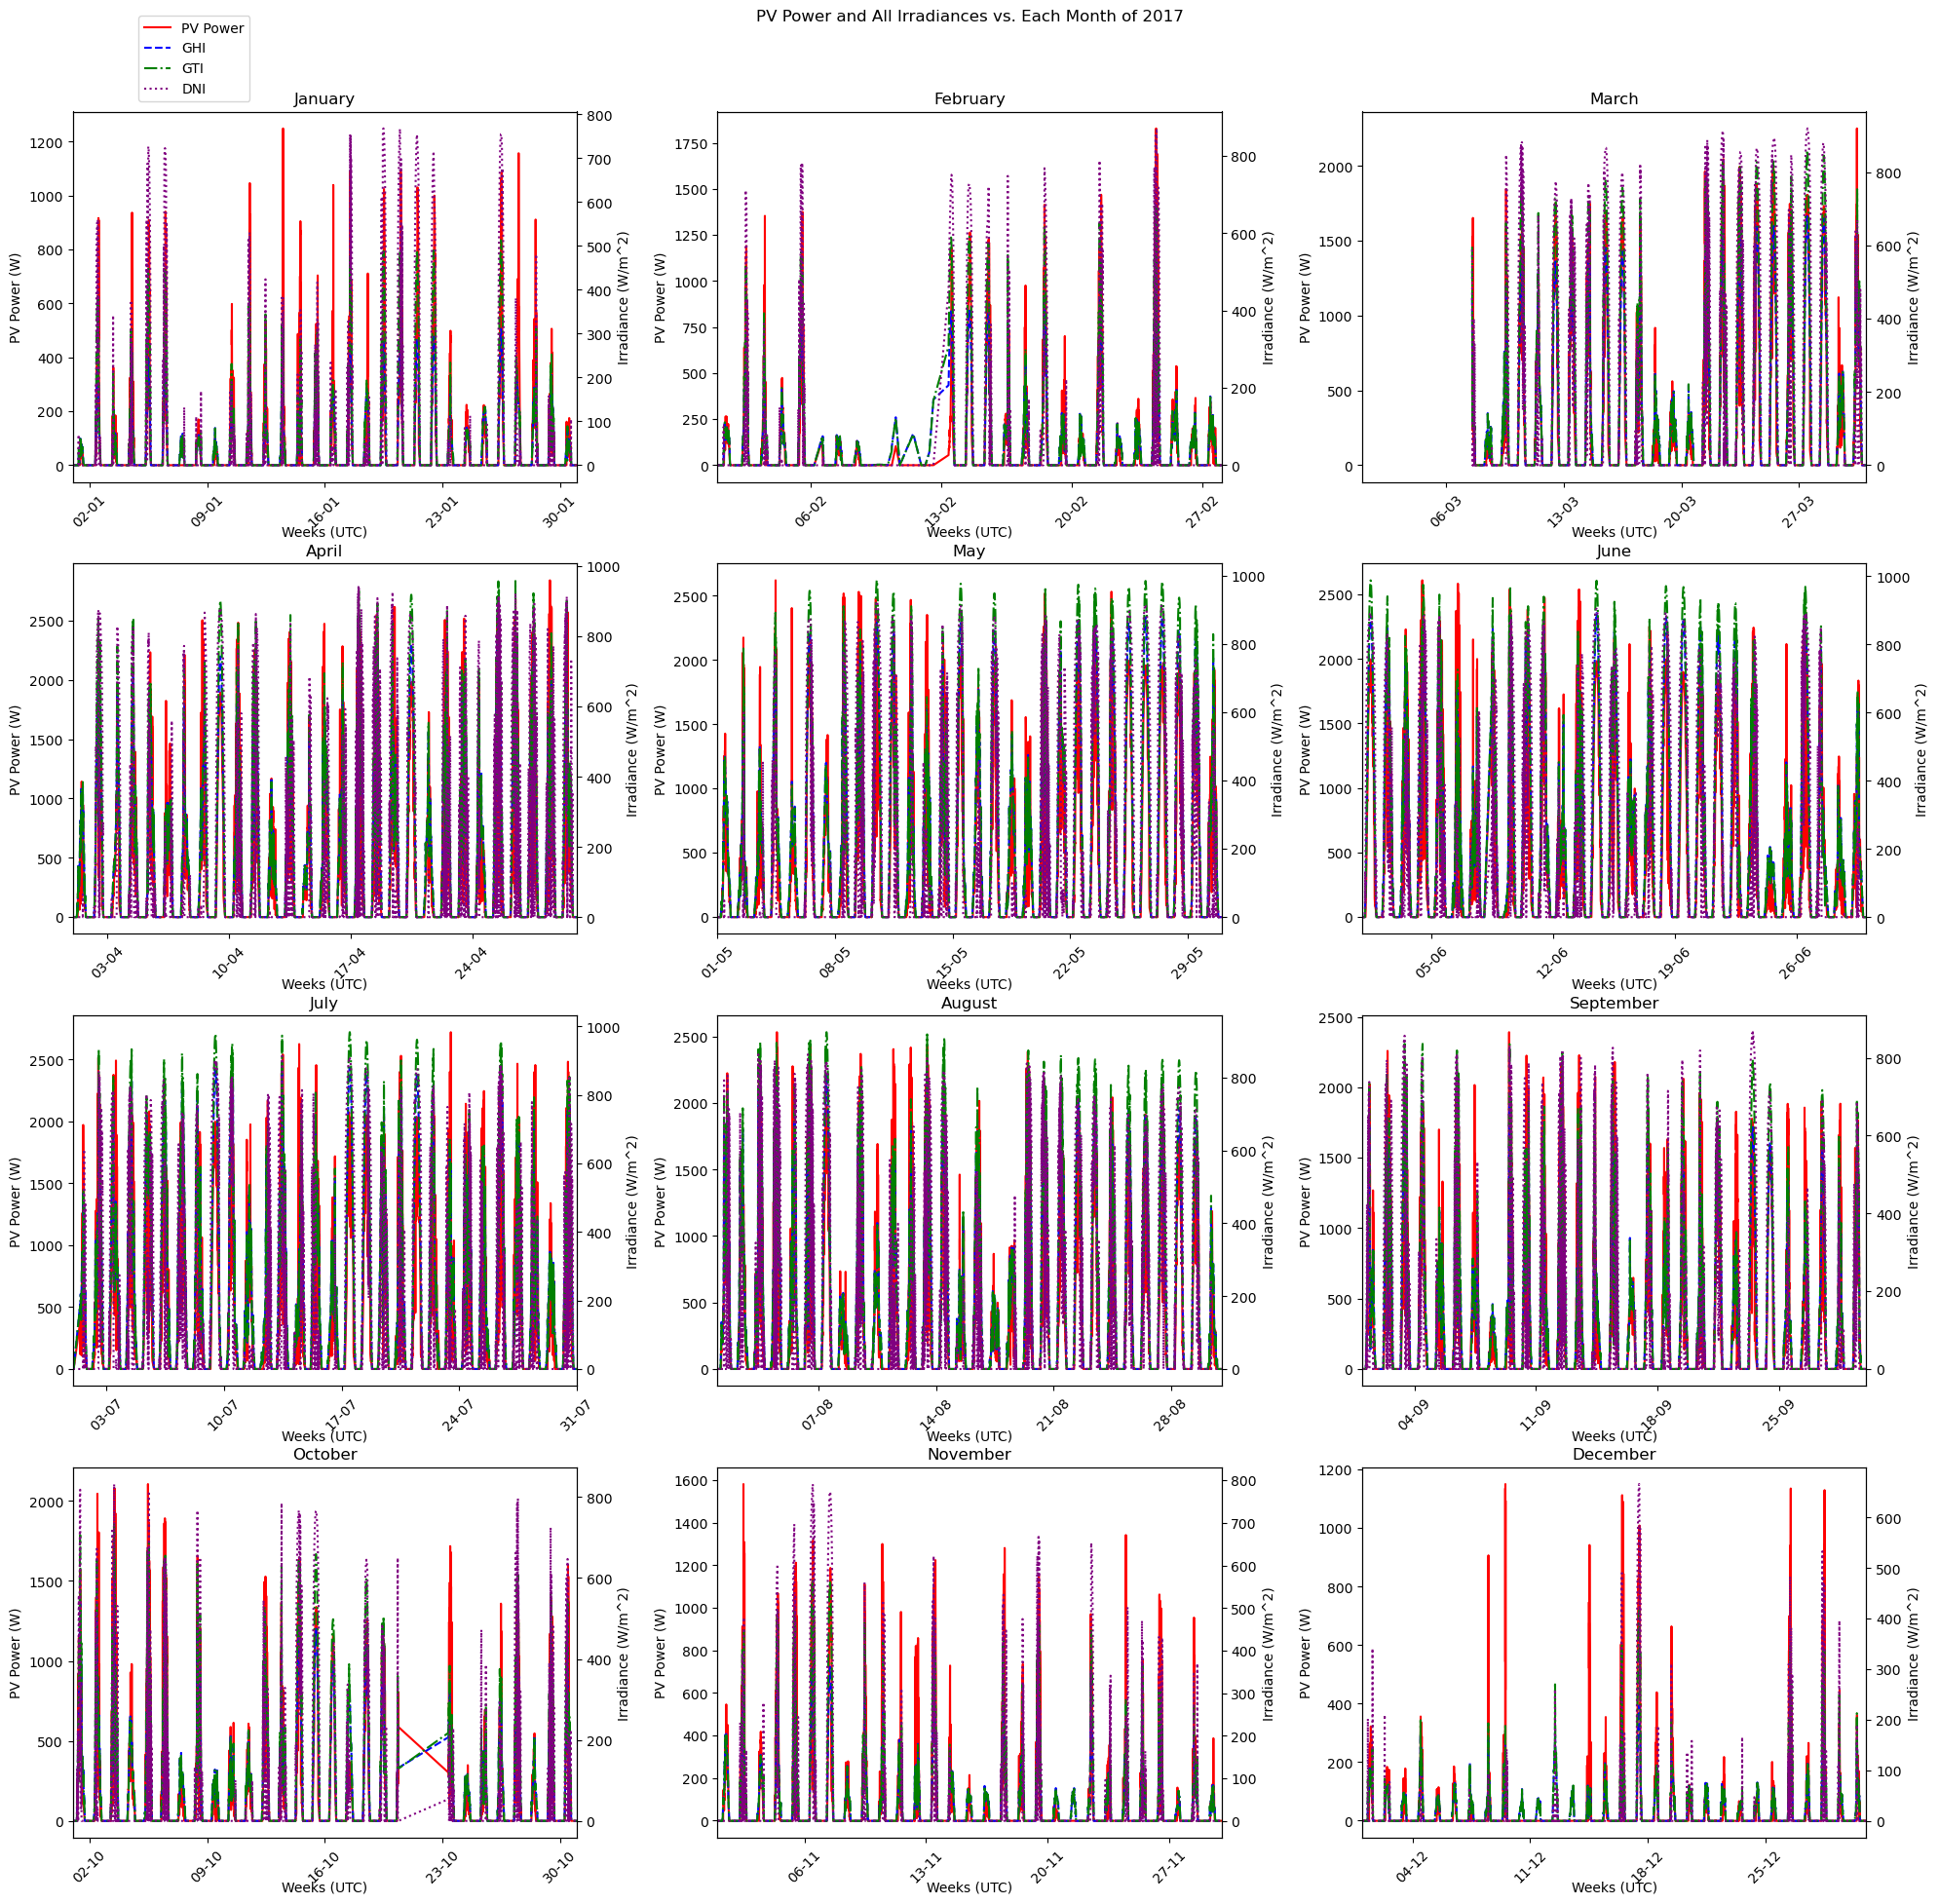

In [7]:
# Load the dataset
file_path = './FINAL_PV_POWER_5_MINS.csv'
data = pd.read_csv(file_path)

# Convert the 'TimeStamp' column to datetime format
data['TimeStamp'] = pd.to_datetime(data['TimeStamp'])

# Filter the data for the year 2017
start_time = '2017-01-01 00:00'
end_time = '2017-12-31 23:55'
filtered_data = data[(data['TimeStamp'] >= start_time) & (data['TimeStamp'] <= end_time)]

# Remove rows with missing 'PV_Power' values
filtered_data = filtered_data.dropna(subset=['PV_Power'])

# Create subplots for each month
fig, axs = plt.subplots(4, 3, figsize=(20, 20), sharex=False)
fig.subplots_adjust(hspace=0.5, wspace=0.3)
axs = axs.flatten()

# Define month names and days for titles and x-axis limits
month_names = ['January', 'February', 'March', 'April', 'May', 'June', 
               'July', 'August', 'September', 'October', 'November', 'December']
days_in_month = [31, 28, 31, 30, 31, 30, 31, 31, 30, 31, 30, 31]

# Initialize lists to store line handles and labels for the legend
lines = []
labels = []

# Plot data for each month
for month in range(1, 13):
    month_data = filtered_data[filtered_data['TimeStamp'].dt.month == month]
    
    ax1 = axs[month-1]
    ax2 = ax1.twinx()

    line1, = ax1.plot(month_data['TimeStamp'], month_data['PV_Power'], label='PV Power', color='red')
    line2, = ax2.plot(month_data['TimeStamp'], month_data['ghi'], color='blue', linestyle='--', label='GHI')
    line3, = ax2.plot(month_data['TimeStamp'], month_data['gti'], color='green', linestyle='-.', label='GTI')
    line4, = ax2.plot(month_data['TimeStamp'], month_data['dni'], color='purple', linestyle=':', label='DNI')

    if month == 1:  # Collect handles and labels from the first plot only for the legend
        lines.extend([line1, line2, line3, line4])
        labels.extend([line1.get_label(), line2.get_label(), line3.get_label(), line4.get_label()])

    ax1.set_title(month_names[month-1])
    ax1.set_ylabel('PV Power (W)')
    ax2.set_ylabel('Irradiance (W/m^2)')
    ax1.tick_params(axis='y', colors='black')
    ax2.tick_params(axis='y', colors='black')
    
    # Set x-axis limits to cover the full month and set ticks for every 7 days
    ax1.set_xlim(pd.Timestamp(f'2017-{month:02d}-01'), pd.Timestamp(f'2017-{month:02d}-{days_in_month[month-1]}'))
    ax1.xaxis.set_major_locator(WeekdayLocator(byweekday=MO, interval=1))
    ax1.xaxis.set_major_formatter(DateFormatter('%d-%m'))
    plt.setp(ax1.xaxis.get_majorticklabels(), rotation=45)

# Add a single legend for the entire figure
fig.legend(lines, labels, loc='upper left', bbox_to_anchor=(0.07, 0.97))

# Overall title and layout adjustments
plt.suptitle('PV Power and All Irradiances vs. Each Month of 2017', y=0.97)
plt.tight_layout(rect=[0, 0, 1, 0.95])

# Set the x-axis label for the entire figure
for ax in axs:
    ax.set_xlabel('Weeks (UTC)', labelpad=-3)

# Show the plot
plt.show()